# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch Rifky Aulia Adikusumah
- **Email:** rifkyadi67@gmail.com
- **ID Dicoding:** rifkyadi

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan jumlah pengguna kasual dan terdaftar setiap bulannya?
2. Bagaimana fluktuasi jumlah pengguna kasual dan terdaftar sepanjang tahun? Apakah ada perbedaan pola fluktuasi antara kedua jenis pengguna?
3. Bulan apa yang menunjukkan pertumbuhan pengguna kasual dan terdaftar paling signifikan dibandingkan dengan bulan sebelumnya?
4. Bagaimana pola penggunaan sepeda bervariasi sepanjang hari, terutama antara jam sibuk dan jam tidak sibuk, dan faktor-faktor apa saja yang mempengaruhi variasi tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Tabel day

day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Tabel hour

hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset memiliki struktur yang serupa, dengan kolom-kolom yang memberikan informasi tentang waktu, kondisi cuaca, dan jumlah penyewaan sepeda.
- Dataset hour.csv memberikan detail per jam, sedangkan day.csv memberikan detail per hari.

### Assessing Data

In [4]:
# MENILAI DATA day_df

# Periksa Tipe Data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Periksa duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
# Ringkasam Parameter Statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# MENILAI DATA hour_df

# Periksa Tipe Data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Periksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Ringkasam Parameter Statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe Data:

    - Kolom dteday perlu diubah menjadi tipe data datetime untuk analisis berbasis waktu.

- Dropping:
    - Kolom instant hanya record index, sepertinya tidak terpakai jadi lebih baik dihapus agar data lebih bersih

- Missing Values:

    Kedua dataset tidak memiliki missing values.

- Duplikasi Data:

    Kedua dataset tidak memiliki duplikasi data.

- Statistik Deskriptif:

    - Jumlah penyewaan sepeda bervariasi secara signifikan, baik per jam maupun per hari.
    - Rata-rata pengguna terdaftar jauh lebih tinggi daripada pengguna kasual.
    - Kondisi cuaca (suhu, kelembaban, kecepatan angin) bervariasi sepanjang waktu.
    - Pada dataset hour, rata-rata jam adalah sekitar jam 11,5 yang berarti data tersebar selama 24 jam.

### Cleaning Data

In [10]:
# Hapus kolom instant

hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Ubah tipe data object ke date
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print(hour_df['dteday'].dtype)
print(day_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


**Insight:**
- Sudah berhasil mengubah tipe data kolom dteday menjadi datetime
- Menghapus kolom instant

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Penggunaan sepeda per musim (day_df)
pivot_season = pd.pivot_table(day_df, values='cnt', index='season', aggfunc='sum', observed=True)
pivot_season.head()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [13]:
# Penggunaan sepeda per hari kerja (day_df)
pivot_workingday = pd.pivot_table(day_df, values='cnt', index='workingday', aggfunc='mean')
pivot_workingday.head()

,cnt
workingday,
0,4330.168831
1,4584.820000


In [14]:
# Penggunaan sepeda per bulan (day_df)
pivot_month = pd.pivot_table(day_df, values='cnt', index='mnth', aggfunc='mean', observed=True)
pivot_month.head(12)

,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


In [15]:
# Penggunaan sepeda per jam (hour_df)
pivot_hour = pd.pivot_table(hour_df, values='cnt', index='hr', aggfunc='mean')
pivot_hour.head(24)

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [16]:
# Distribusi Penggunaan Sepeda (Harian)
distribusi_harian = day_df['cnt'].describe()
distribusi_harian.head(10)

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [17]:
# Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda
pengaruh_cuaca = pd.pivot_table(day_df, values='cnt', index='weathersit', aggfunc='mean', observed=True)
pengaruh_cuaca.head()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [18]:
# Hubungan Suhu dan Penggunaan Sepeda
korelasi_suhu = day_df[['temp', 'cnt']].corr()
korelasi_suhu.head()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [19]:
# Pengaruh Hari dalam Seminggu terhadap Penggunaan Sepeda
pengaruh_hari = pd.pivot_table(day_df, values='cnt', index='weekday', aggfunc='mean', observed=True)
pengaruh_hari.head(7)

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [20]:
# Perbandingan Pengguna Casual dan Registered per Bulan
perbandingan_pengguna = day_df.groupby('mnth', observed=True)[['casual', 'registered']].sum()
perbandingan_pengguna.head(12)

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


In [21]:
# Bandingkan pengguna kasual dan terdaftar
data = day_df.groupby('mnth')[['casual', 'registered']].sum()
data = data.rename(columns={'casual': 'Kasual', 'registered': 'Terdaftar'})

# Hitung rata-rata
data.loc['Rata-rata'] = data.mean()

# Tampilkan tabel
print(data)

                 Kasual      Terdaftar
mnth                                  
1          12042.000000  122891.000000
2          14963.000000  136389.000000
3          44444.000000  184476.000000
4          60802.000000  208292.000000
5          75285.000000  256401.000000
6          73906.000000  272436.000000
7          78157.000000  266791.000000
8          72039.000000  279155.000000
9          70323.000000  275668.000000
10         59760.000000  262592.000000
11         36603.000000  218228.000000
12         21693.000000  189343.000000
Rata-rata  51668.083333  222721.833333


In [22]:

# Menghitung pertumbuhan pengguna per bulan
casual_growth = day_df.groupby('mnth')['casual'].sum().pct_change() * 100
registered_growth = day_df.groupby('mnth')['registered'].sum().pct_change() * 100

# Menggabungkan data ke dalam tabel
growth_table = pd.DataFrame({
    'Kasual (%)': casual_growth,
    'Terdaftar (%)': registered_growth
})

# Menampilkan tabel
print(growth_table)

      Kasual (%)  Terdaftar (%)
mnth                           
1            NaN            NaN
2      24.256768      10.983717
3     197.025997      35.257242
4      36.805868      12.910080
5      23.819940      23.096902
6      -1.831706       6.253876
7       5.751901      -2.072046
8      -7.827834       4.634339
9      -2.382043      -1.249127
10    -15.020690      -4.743387
11    -38.750000     -16.894650
12    -40.734366     -13.236157


**Insight:**
- Musiman: Penggunaan sepeda sangat dipengaruhi oleh musim, dengan puncak penggunaan di musim hangat (musim semi dan musim panas) dan penurunan di musim dingin.
- Harian: Penggunaan sepeda juga dipengaruhi oleh hari dalam seminggu, dengan hari kerja menunjukkan tingkat penggunaan yang lebih tinggi dan puncak pada hari Jumat.
- Jam: Penggunaan sepeda memiliki pola harian yang jelas, dengan puncak di jam sibuk komuter (pagi dan sore) dan penggunaan terendah di jam sepi (dini hari).
- Cuaca: Kondisi cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda, dengan cuaca cerah mendorong penggunaan dan cuaca buruk menghambatnya.
- Suhu: Terdapat korelasi positif yang cukup kuat antara suhu dan penggunaan sepeda. Semakin tinggi suhu, semakin tinggi kemungkinan orang menggunakan sepeda.
- Tipe Pengguna: Pengguna terdaftar secara konsisten mendominasi penggunaan sepeda dibandingkan pengguna kasual.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah pengguna kasual dan terdaftar setiap bulannya?

<Figure size 1200x600 with 0 Axes>

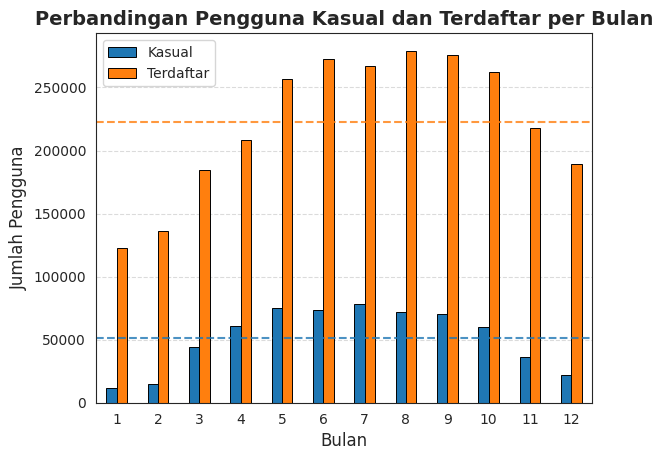

In [23]:
sns.set_style("white")
plt.figure(figsize=(12, 6))

colors = ["#1f77b4", "#ff7f0e"]  
data = day_df.groupby('mnth')[['casual', 'registered']].sum()
data = data.rename(columns={'casual': 'Kasual', 'registered': 'Terdaftar'})

kasual_avg = data['Kasual'].mean()
terdaftar_avg = data['Terdaftar'].mean()

data.plot(kind='bar', color=colors, edgecolor='black', linewidth=0.7)

plt.axhline(kasual_avg, color='#1f77b4', linestyle='--', linewidth=1.5, alpha=0.8)
plt.axhline(terdaftar_avg, color='#ff7f0e', linestyle='--', linewidth=1.5, alpha=0.8)

plt.title('Perbandingan Pengguna Kasual dan Terdaftar per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)

plt.xticks(rotation=0)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Grafik menunjukkan bahwa pengguna terdaftar mendominasi jumlah pengguna secara keseluruhan. Meskipun pengguna kasual mengalami fluktuasi, jumlah mereka selalu jauh lebih rendah dibandingkan pengguna terdaftar. Hal ini menunjukkan bahwa strategi untuk mempertahankan dan meningkatkan jumlah pengguna terdaftar mungkin lebih efektif dalam jangka panjang.

### Pertanyaan 2: Bagaimana fluktuasi jumlah pengguna kasual dan terdaftar sepanjang tahun? Apakah ada perbedaan pola fluktuasi antara kedua jenis pengguna?

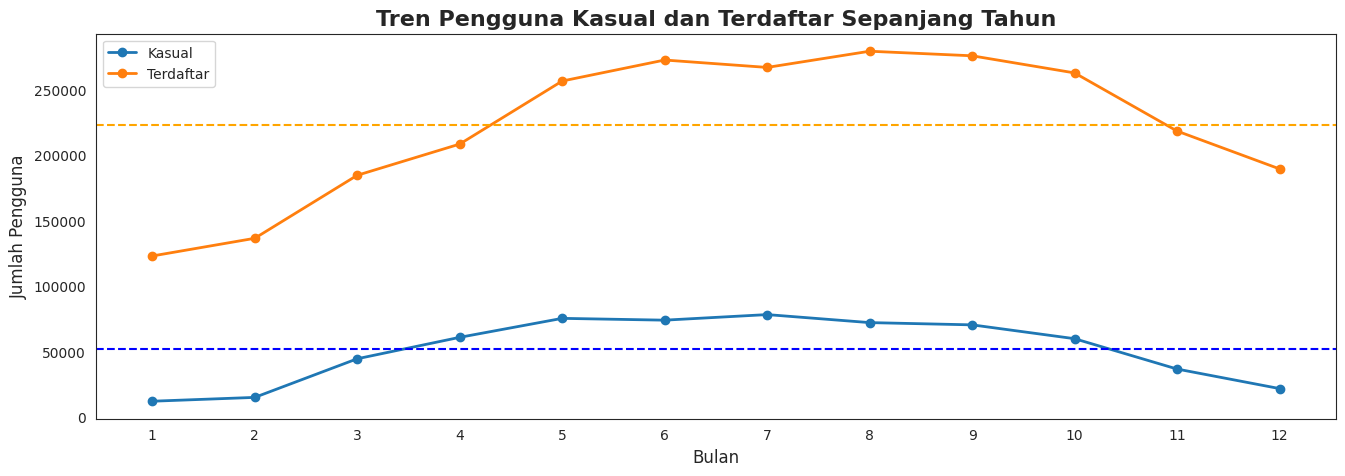

In [24]:
sns.set_style("white")

plt.figure(figsize=(16, 5))

casual_data = day_df.groupby('mnth')['casual'].sum()
registered_data = day_df.groupby('mnth')['registered'].sum()

casual_avg = casual_data.mean()
registered_avg = registered_data.mean()

x_labels = np.arange(len(casual_data.index))

plt.plot(x_labels, casual_data, marker='o', linestyle='-', linewidth=2, color='tab:blue', label="Kasual")
plt.plot(x_labels, registered_data, marker='o', linestyle='-', linewidth=2, color='tab:orange', label="Terdaftar")

plt.axhline(casual_avg, color='blue', linestyle='--', linewidth=1.5)
plt.axhline(registered_avg, color='orange', linestyle='--', linewidth=1.5)

plt.xticks(x_labels, casual_data.index)

plt.title("Tren Pengguna Kasual dan Terdaftar Sepanjang Tahun", fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.legend(fontsize=10, loc="upper left")

plt.grid(False)
plt.show()

Kedua jenis pengguna mengalami fluktuasi sepanjang tahun, namun dengan pola dan amplitudo yang berbeda. Pengguna kasual menunjukkan fluktuasi yang lebih besar dan pola musiman yang lebih kuat, sementara pengguna terdaftar menunjukkan stabilitas yang lebih besar dan fluktuasi yang lebih halus. Perbedaan ini mungkin disebabkan oleh perbedaan perilaku dan motivasi antara pengguna kasual dan terdaftar.

### Pertanyaan 3: Bulan apa yang menunjukkan pertumbuhan pengguna kasual dan terdaftar paling signifikan dibandingkan dengan bulan sebelumnya?

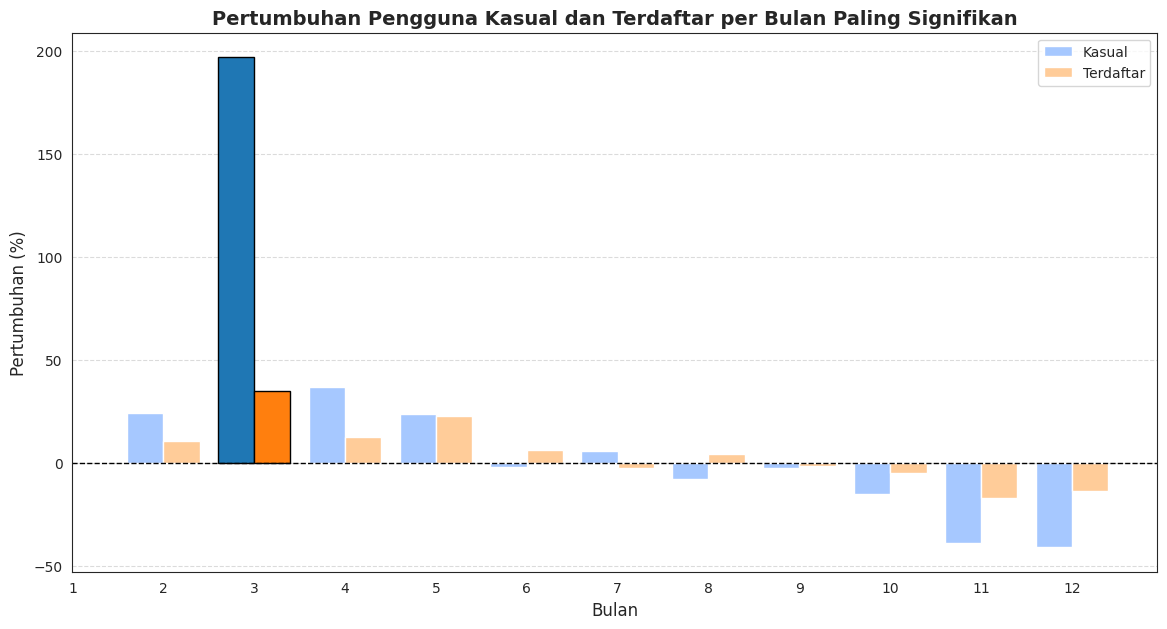

In [25]:
sns.set_style("white")

casual_growth = day_df.groupby('mnth')['casual'].sum().pct_change() * 100
registered_growth = day_df.groupby('mnth')['registered'].sum().pct_change() * 100

max_casual_idx = casual_growth.idxmax()
max_registered_idx = registered_growth.idxmax()

plt.figure(figsize=(14, 7))
x_labels = np.arange(len(casual_growth.index))

light_blue = "#a6c8ff"
light_orange = "#ffcc99"

bars1 = plt.bar(
    x_labels - 0.2, casual_growth, width=0.4, label='Kasual', color=light_blue
)
bars2 = plt.bar(
    x_labels + 0.2, registered_growth, width=0.4, label='Terdaftar', color=light_orange
)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if casual_growth.index[i] == max_casual_idx:
        bar1.set_color("tab:blue") 
        bar1.set_edgecolor('black')
    if registered_growth.index[i] == max_registered_idx:
        bar2.set_color("tab:orange") 
        bar2.set_edgecolor('black')

plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Pertumbuhan (%)', fontsize=12)
plt.title('Pertumbuhan Pengguna Kasual dan Terdaftar per Bulan Paling Signifikan', fontsize=14, fontweight='bold')

plt.xticks(x_labels, casual_growth.index)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Bulan ke-3 adalah bulan di mana baik pengguna kasual maupun terdaftar mengalami pertumbuhan paling signifikan dibandingkan bulan sebelumnya. Hal ini menunjukkan bahwa ada faktor tertentu yang mendorong peningkatan jumlah pengguna, baik kasual maupun terdaftar, di bulan tersebut.

## Analisis Lanjutan Menggunakan Clustering

### Pertanyaan 4: Bagaimana pola penggunaan sepeda bervariasi sepanjang hari, terutama antara jam sibuk dan jam tidak sibuk, dan faktor-faktor apa saja yang mempengaruhi variasi tersebut?

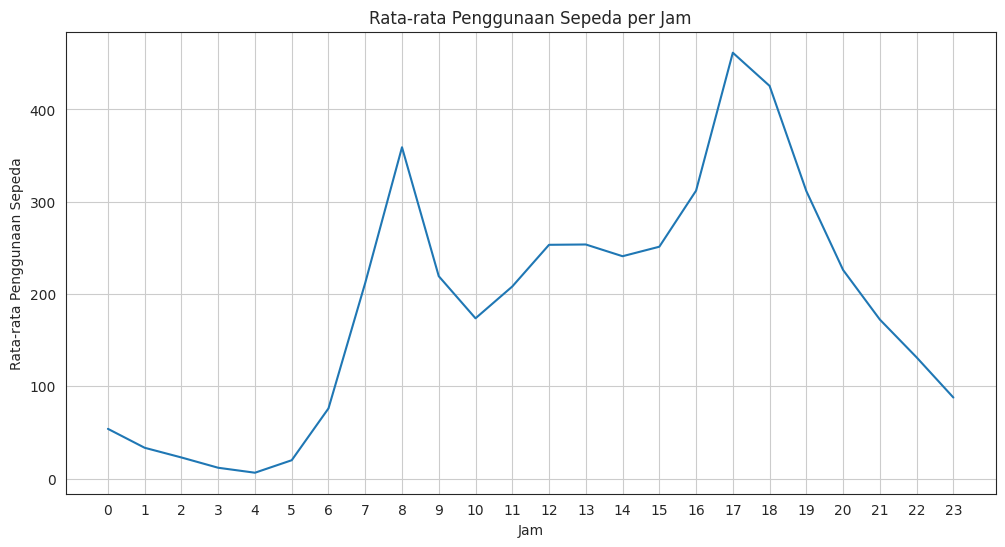

In [26]:
# Visualisasi rata-rata penggunaan sepeda per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_avg)
plt.title('Rata-rata Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [27]:
# Berdasarkan grafik, asumsikan jam sibuk: 7-9 pagi dan 16-18 sore
def group_hours(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 18:
        return 'Jam Sibuk'
    else:
        return 'Jam Tidak Sibuk'

hour_df['kelompok_jam'] = hour_df['hr'].apply(group_hours)

# Analisis karakteristik kelompok jam
cluster_characteristics = hour_df.groupby('kelompok_jam').agg({
    'weathersit': 'mean',
    'temp': 'mean',
    'weekday': lambda x: np.bincount(x.astype(int)).argmax(),  # Modus hari dalam seminggu
    'cnt': 'mean'
}).reset_index()

cluster_characteristics.head()

,kelompok_jam,weathersit,temp,weekday,cnt
0,Jam Sibuk,1.444038,0.505338,0,331.652552
1,Jam Tidak Sibuk,1.418985,0.494183,6,141.713221


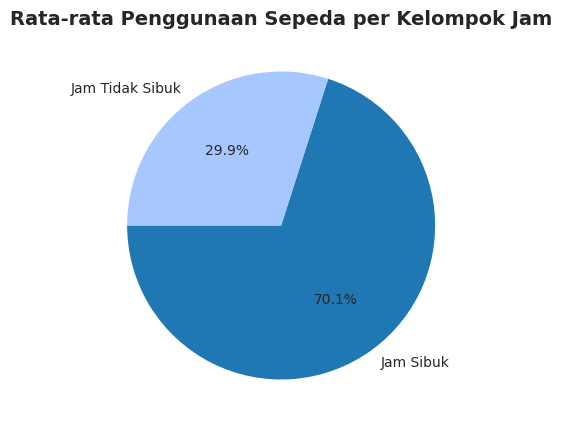

In [28]:
# Urutkan data berdasarkan jumlah penggunaan sepeda
cluster_characteristics = cluster_characteristics.sort_values(by="cnt", ascending=False)

colors = ["#1f77b4" if cnt == cluster_characteristics["cnt"].max() else "#a6c8ff" for cnt in cluster_characteristics["cnt"]]
fig, ax = plt.subplots(figsize=(10, 5))

ax.pie(
    cluster_characteristics["cnt"],
    labels=cluster_characteristics["kelompok_jam"],
    autopct="%1.1f%%",
    colors=colors,
    startangle=180,  
    wedgeprops={"linewidth": 0, "edgecolor": "white"}  
)

plt.title("Rata-rata Penggunaan Sepeda per Kelompok Jam", fontsize=14, fontweight="bold")
plt.show()

Grafik ini dengan jelas menunjukkan perbedaan signifikan dalam rata-rata penggunaan sepeda antara jam sibuk dan jam tidak sibuk, di mana jam sibuk memiliki rata-rata penggunaan yang jauh lebih tinggi, mengindikasikan dominasi aktivitas bersepeda pada jam-jam tersebut yang kemungkinan besar dipengaruhi oleh rutinitas harian seperti berangkat dan pulang kerja atau sekolah.

## Conclusion

1. **Perbandingan pengguna kasual dan terdaftar setiap bulan**  
   Pengguna terdaftar selalu lebih banyak dibandingkan pengguna kasual setiap bulannya. Meskipun jumlah pengguna kasual naik turun, mereka tetap jauh lebih sedikit dibandingkan pelanggan yang sudah berlangganan. Ini menunjukkan bahwa layanan penyewaan sepeda lebih banyak dimanfaatkan oleh pengguna tetap.  

2. **Fluktuasi jumlah pengguna sepanjang tahun**  
   Pengguna kasual dan terdaftar sama-sama mengalami perubahan jumlah sepanjang tahun, tapi dengan pola yang berbeda. Pengguna kasual cenderung mengalami lonjakan besar saat cuaca lebih hangat, sementara pengguna terdaftar lebih stabil dan tidak terlalu banyak berubah. Ini menunjukkan bahwa pengguna kasual lebih dipengaruhi oleh faktor musiman, sedangkan pengguna terdaftar lebih rutin dalam menggunakan layanan.  

3. **Bulan dengan pertumbuhan pengguna paling signifikan**  
   Bulan ketiga dalam setahun menunjukkan peningkatan jumlah pengguna yang paling besar, baik untuk pengguna kasual maupun terdaftar. Kemungkinan besar ini disebabkan oleh faktor seperti cuaca yang lebih mendukung atau adanya promosi yang menarik di bulan tersebut.  

4. **Pola penggunaan sepeda sepanjang hari**  
   Jumlah pengguna sepeda paling tinggi di jam-jam sibuk, terutama pagi dan sore hari, yang bertepatan dengan waktu berangkat dan pulang kerja atau sekolah. Hal ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai bagian dari rutinitas harian mereka.

Secara keseluruhan, analisis ini memberikan gambaran jelas tentang kebiasaan pengguna sepeda dan faktor-faktor yang memengaruhinya. Wawasan ini bisa digunakan untuk meningkatkan layanan, merancang strategi pemasaran yang lebih efektif, dan membuat pengalaman pengguna jadi lebih baik.